In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)

In [3]:
n_tree = 50

bag = BaggingRegressor(n_estimators=n_tree, n_jobs=-1)
rf = RandomForestRegressor(n_estimators=n_tree, n_jobs=-1)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

bag_pred = np.array([bag.estimators_[tree].predict(X_test) for tree in range(n_tree)])
rf_pred = np.array([rf.estimators_[tree].predict(X_test) for tree in range(n_tree)])

bag_var = np.var(bag_pred, axis=0)
rf_var = np.var(rf_pred, axis=0)

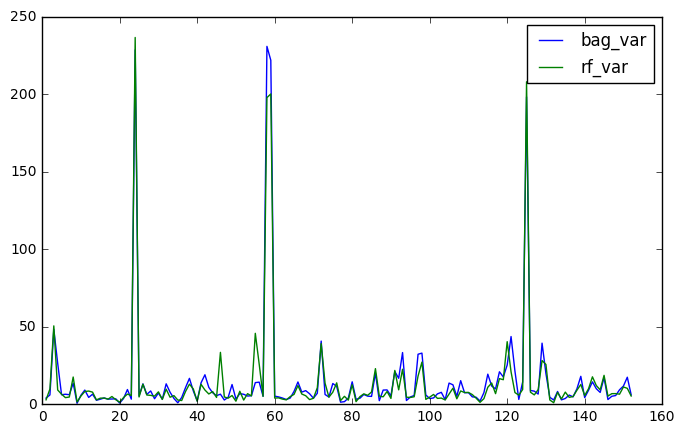

In [4]:
plt.figure(figsize=(8, 5))

plt.plot(range(1, len(bag_var)+1), bag_var)
plt.plot(range(1, len(rf_var)+1), rf_var)
plt.legend(['bag_var', 'rf_var'])
plt.show()

In [5]:
print 'bagging variance average:', round(np.mean(bag_var), 3)
print 'random forest variance average:', round(np.mean(rf_var), 3)

bagging variance average: 15.121
random forest variance average: 14.311
